___

# Data and Machine Learning Models Analysis Template
___


___
## Imports section

In [152]:
# data analysis
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# ploting
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15,5)

# data preprocesing
from sklearn.preprocessing import Imputer #replace missing data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder #encoding categorical data
from sklearn.preprocessing import StandardScaler #feature scaling

#spliting data
from sklearn.cross_validation import train_test_split

#models
from sklearn.linear_model import LinearRegression

# metrics
from sklearn.metrics import r2_score# data analysis
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# ploting
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15,5)

# data preprocesing
from sklearn.preprocessing import Imputer #replace missing data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder #encoding categorical data
from sklearn.preprocessing import StandardScaler #feature scaling

#spliting data
from sklearn.cross_validation import train_test_split

#models
from sklearn.linear_model import LinearRegression

# metrics
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from math import sqrt

___
## Data Exploring

In [122]:
df = pd.read_csv('template_data.csv');
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address,State
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208,Michael,Ferry,Apt.,674Laurabury,NE,37010-5101",NE
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188,Johnson,Views,Suite,079Lake,Kathleen,CA,48958",CA
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127,Elizabeth,StravenueDanieltown,WI,06482-3489",WI
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,"USS,BarnettFPO,AP,44820",AP
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,"USNS,RaymondFPO,AE,09386",AE


### Data Info

In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
Avg. Area Income                5000 non-null float64
Avg. Area House Age             5000 non-null float64
Avg. Area Number of Rooms       5000 non-null float64
Avg. Area Number of Bedrooms    5000 non-null float64
Area Population                 5000 non-null float64
Price                           5000 non-null float64
Address                         5000 non-null object
State                           5000 non-null object
dtypes: float64(6), object(2)
memory usage: 312.6+ KB


### Data Describe

In [124]:
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


### Histogram

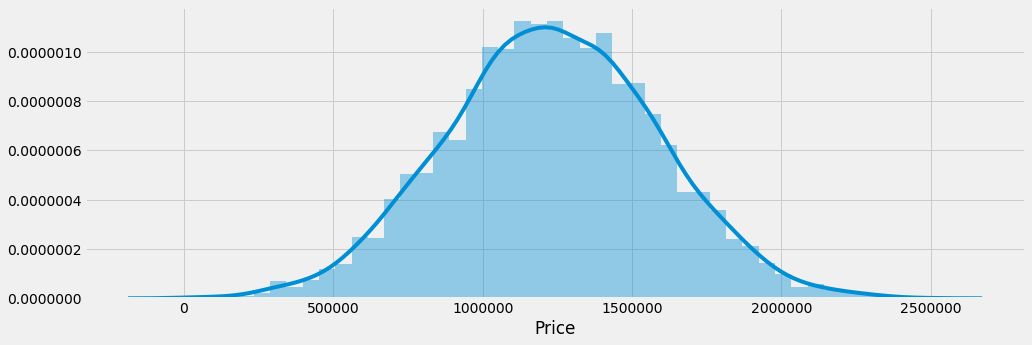

In [125]:
sns.distplot(df['Price'])

### Correlation

In [126]:
df.corr()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
Avg. Area Income,1.000000,-0.002007,-0.011032,0.019788,-0.016234,0.639734
Avg. Area House Age,-0.002007,1.000000,-0.009428,0.006149,-0.018743,0.452543
Avg. Area Number of Rooms,-0.011032,-0.009428,1.000000,0.462695,0.002040,0.335664
Avg. Area Number of Bedrooms,0.019788,0.006149,0.462695,1.000000,-0.022168,0.171071
Area Population,-0.016234,-0.018743,0.002040,-0.022168,1.000000,0.408556
Price,0.639734,0.452543,0.335664,0.171071,0.408556,1.000000


In [127]:
def show_corr(data, ylabel):
    for columnName in df.columns.values.tolist():
        column = data[columnName]
        if column.dtype == "object" or columnName == ylabel:
            continue
        column = column.reshape(-1,1)
        xlabel = columnName.upper()
        y = data[ylabel]
        model = LinearRegression()
        model.fit(column, y)
        predictions =  model.predict(column)
        plt.plot(column, predictions, color='red', linewidth=2)
        plt.scatter(column, y, alpha=0.4, c=y)
        plt.xlabel(xlabel)
        plt.ylabel(ylabel.upper())
        plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  


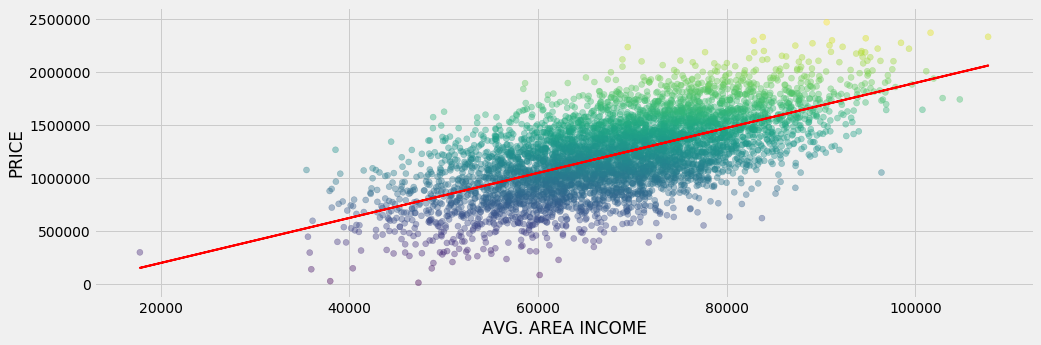

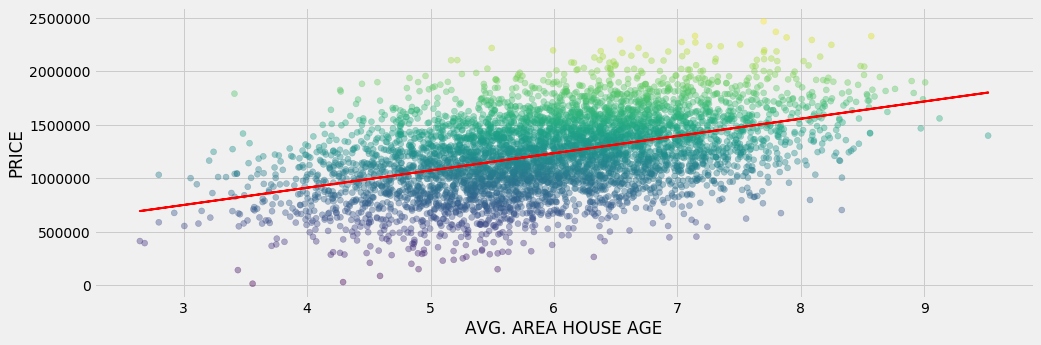

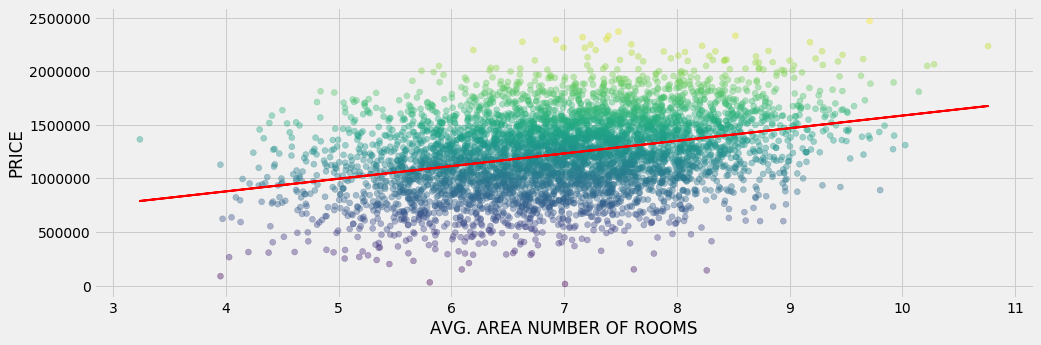

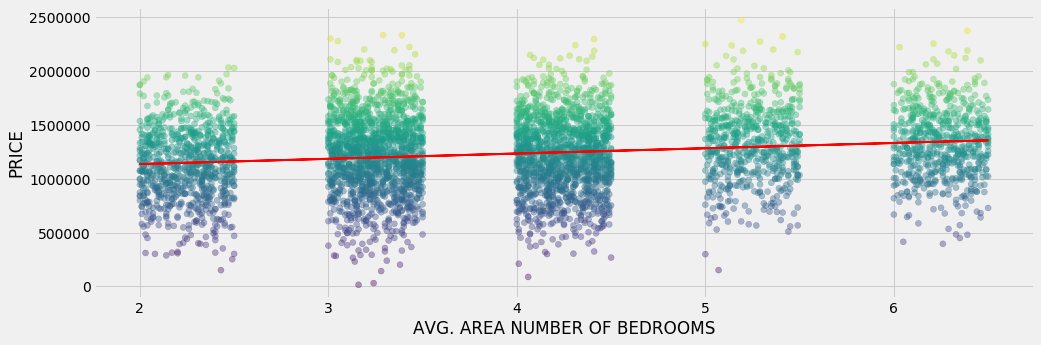

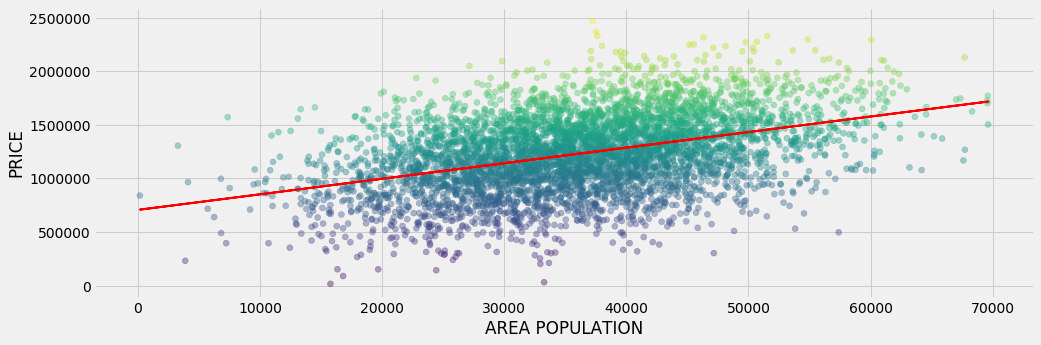

In [128]:
show_corr(df,"Price")

### Heatmap

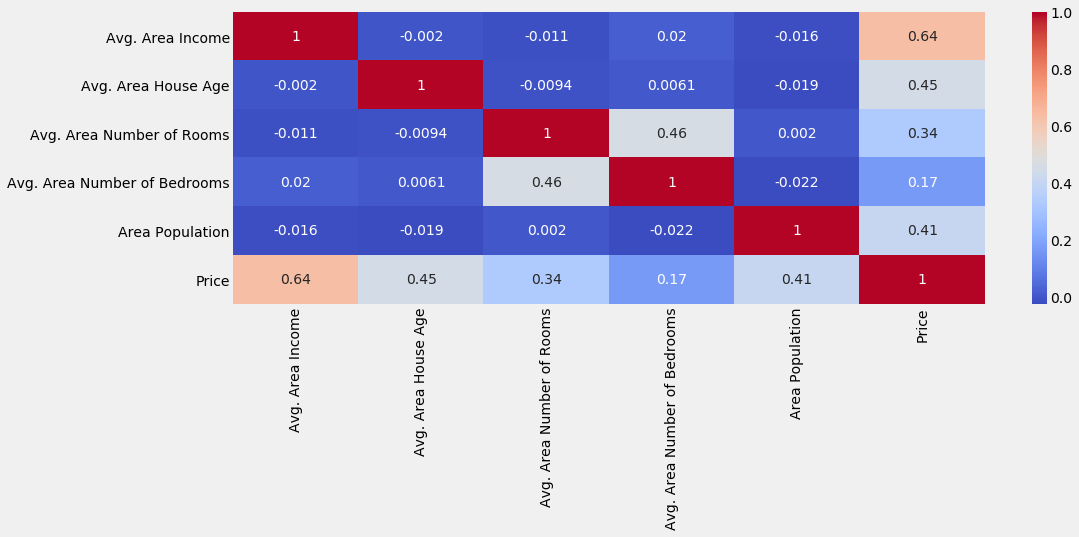

In [129]:
sns.heatmap(data=df.corr(),cmap="coolwarm",annot=True)

## Statistics

In [130]:
def show_data_set_stats(y):
    values = y.values
    min_value= np.min(values)
    max_value= np.max(values)
    mean_value= np.mean(values)
    median_value= np.median(values)
    std_values = np.std(values)
    print ("Min                : {:,.2f}".format(min_value))
    print ("Max                : {:,.2f}".format(max_value))
    print ("Mean               : {:,.2f}".format(mean_value))
    print ("Median             : {:,.2f}".format(median_value))
    print ("Standard Deviation : {:,.2f}".format(std_values))    

In [131]:
show_data_set_stats(df['Price'])

Min                : 15,938.66
Max                : 2,469,065.59
Mean               : 1,232,072.65
Median             : 1,232,669.38
Standard Deviation : 353,082.31


___
## Data Processing

### Separation: X (features) from Y (predict variable)

In [132]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address',
       'State'],
      dtype='object')

In [133]:
y = df['Price']
X = df[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population','State']].values #address is not relavant for this

### Dealing with Missing Data

In [134]:
# this should be used with careful so the predictions are note affected
# this data set does not have missing data, bu supose we have in one of the columns
# by default: missing_values='NaN', strategy='mean', that means replace NaN valuues with the column mean
imputer = Imputer(axis=0)
imputer = imputer.fit(X[:,0:1])
X[:,0:1] = imputer.transform(X[:,0:1])

### Encoding Categorical Data

In [135]:
label_enconder = LabelEncoder()
# categorizing the State column as number values
X[:,5] = label_enconder.fit_transform(X[:,5])
pd.DataFrame(X).head()

,0,1,2,3,4,5
0,79545.5,5.68286,7.00919,4.09,23086.8,37
1,79248.6,6.0029,6.73082,3.09,40173.1,8
2,61287.1,5.86589,8.51273,5.13,36882.2,59
3,63345.2,7.18824,5.58673,3.26,34310.2,4
4,59982.2,5.04055,7.83939,4.23,26354.1,1


In [136]:
# So the ML algorithm do not thing each state has a bigger value then the 
#other categorize using one hot. A colum for each country will be created 
#with a 0 or 1 value (dummy enconding)
onehot_encoder = OneHotEncoder(categorical_features=[5]) 
X = onehot_encoder.fit_transform(X).toarray() 
pd.DataFrame(X).head()

,0,1,2,3,4,5,6,7,8,9,...,57,58,59,60,61,62,63,64,65,66
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,79545.458574,5.682861,7.009188,4.09,23086.800503
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,79248.642455,6.002900,6.730821,3.09,40173.072174
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,61287.067179,5.865890,8.512727,5.13,36882.159400
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,63345.240046,7.188236,5.586729,3.26,34310.242831
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,59982.197226,5.040555,7.839388,4.23,26354.109472


In [137]:
#showing the transformations
columns = []
for i in range(62):
    columns.append("State " + str(i))

nc = np.array(columns)
col = ['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms','Avg. Area Number of Bedrooms', 'Area Population']
col = np.array(col)
np_columns = np.concatenate((nc,col))
pd.DataFrame(data=X, columns=np_columns).head()

,State 0,State 1,State 2,State 3,State 4,State 5,State 6,State 7,State 8,State 9,...,State 57,State 58,State 59,State 60,State 61,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,79545.458574,5.682861,7.009188,4.09,23086.800503
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,79248.642455,6.002900,6.730821,3.09,40173.072174
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,61287.067179,5.865890,8.512727,5.13,36882.159400
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,63345.240046,7.188236,5.586729,3.26,34310.242831
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,59982.197226,5.040555,7.839388,4.23,26354.109472


### Feature Scaling

In [138]:
scaler_X = StandardScaler()
X = scaler_X.fit_transform(X)
pd.DataFrame(data=X, columns=np_columns).head()

,State 0,State 1,State 2,State 3,State 4,State 5,State 6,State 7,State 8,State 9,...,State 57,State 58,State 59,State 60,State 61,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
0,-0.19157,-0.185887,-0.116542,-0.119159,-0.187608,-0.118292,-0.125886,-0.132291,-0.125886,-0.123404,...,-0.132291,-0.121722,-0.116542,-0.128323,-0.123404,1.028660,-0.296927,0.021274,0.088062,-1.317599
1,-0.19157,-0.185887,-0.116542,-0.119159,-0.187608,-0.118292,-0.125886,-0.132291,7.943712,-0.123404,...,-0.132291,-0.121722,-0.116542,-0.128323,-0.123404,1.000808,0.025902,-0.255506,-0.722301,0.403999
2,-0.19157,-0.185887,-0.116542,-0.119159,-0.187608,-0.118292,-0.125886,-0.132291,-0.125886,-0.123404,...,-0.132291,-0.121722,8.580610,-0.128323,-0.123404,-0.684629,-0.112303,1.516243,0.930840,0.072410
3,-0.19157,-0.185887,-0.116542,-0.119159,5.330269,-0.118292,-0.125886,-0.132291,-0.125886,-0.123404,...,-0.132291,-0.121722,-0.116542,-0.128323,-0.123404,-0.491499,1.221572,-1.393077,-0.584540,-0.186734
4,-0.19157,5.379602,-0.116542,-0.119159,-0.187608,-0.118292,-0.125886,-0.132291,-0.125886,-0.123404,...,-0.132291,-0.121722,-0.116542,-0.128323,-0.123404,-0.807073,-0.944834,0.846742,0.201513,-0.988387


___
## Model Desing

### Model Performace Analysis

In [150]:
def performance_metric(y_true, y_predict):
    score = r2_score(y_true, y_predict)
    return score

def plot_performance_metrics(y_true, y_predict, model_name):
    #ploting the values
    true_handle = plt.scatter(y_true, y_true, alpha=0.6, color='green', label='true')
    #reference line
    fit = np.poly1d(np.polyfit(y_true,y_true,1))
    lims = np.linspace(min(y_true) - 1, max(y_true) + 1)
    plt.plot(lims, fit(lims), alpha= 0.3, color='black')
    # plot predic valus
    pred_handle =  plt.scatter(y_true, y_predict, alpha=0.6, color='red', label='predicted')
    # legend and show
    plt.legend(handles=[true_handle, pred_handle], loc='upper left')
    score = performance_metric(y_true, y_predict)
    print ("\nThe " + model_name +" model R^2, is {:.3f}.".format(score))
    plt.title("The " + model_name +" model R^2, is {:.3f}.".format(score))
    plt.show()

### Spliting the Data

In [143]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

### Creating and training models

In [144]:
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### Predictions

In [145]:
linear_regressor_predictions = linear_regressor.predict(X_test)

### Performance


The Linear Regression model R^2, is 0.916.


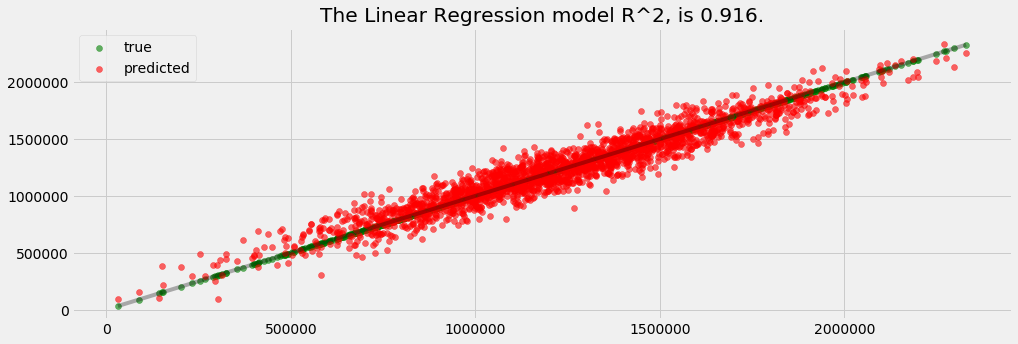

In [151]:
plot_performance_metrics(y_test, linear_regressor_predictions, "Linear Regression")

### Evaluating Model

In [154]:
r2 = r2_score(y_test, linear_regressor_predictions)
mean_absolute_error = mean_absolute_error(y_test,linear_regressor_predictions)
mean_squared_error = mean_squared_error(y_test,linear_regressor_predictions)
root_mean_squared_error = sqrt(mean_squared_error)
print("R^2  : " + str(r2))
print("MAE  : " + str(mean_absolute_error))
print("MSE  : " + str(mean_squared_error))
print("RMSE : " + str(root_mean_squared_error))

R^2  : 0.915791746042
MAE  : 83172.338835
MSE  : 10701224217.3
RMSE : 103446.72163630386


### Residuals

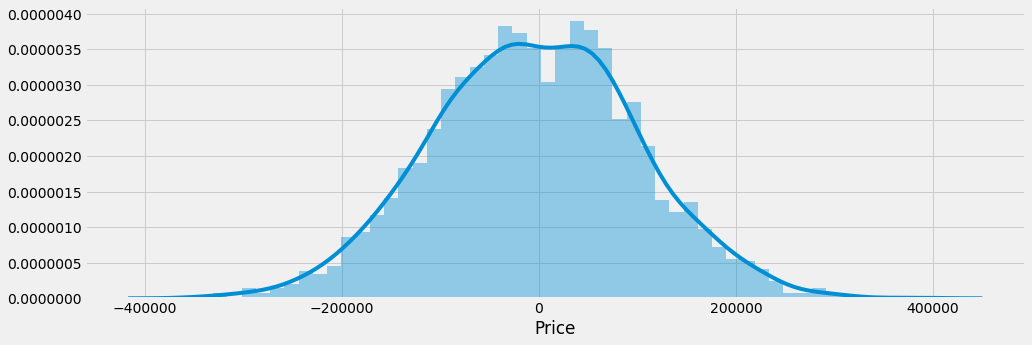

In [156]:
sns.distplot((y_test-linear_regressor_predictions),bins=50);

## Conclusion

In [166]:
coeff_df = pd.DataFrame(linear_regressor.coef_,np_columns,columns=['Coefficient'])
coeff_df

,Coefficient
State 0,3.461889e+16
State 1,3.366158e+16
State 2,2.154075e+16
State 3,2.201103e+16
State 4,3.395204e+16
State 5,2.185546e+16
State 6,2.321592e+16
State 7,2.435761e+16
State 8,2.321592e+16
State 9,2.277202e+16
